In [2]:
import numpy as np
import scipy as sp
import pymc3 as pm
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = {'y': [[245], [218], [255], [126], [182], [71], [102], [65]], 'd1': [[0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0]], 'd2': [[0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0]], 'nstim': 8, 'nsubj': 40, 'a': [1, 1, 1, 2, 1, 2, 2, 2], 'x': [[5, 6, 6, 2, 4, 1, 3, 1], [5, 6, 8, 0, 3, 1, 5, 2], [7, 7, 8, 6, 1, 2, 2, 3], [7, 7, 6, 3, 5, 4, 0, 1], [8, 6, 8, 7, 3, 3, 1, 0], [8, 7, 8, 3, 4, 0, 0, 0], [6, 5, 5, 3, 3, 1, 4, 1], [8, 8, 6, 4, 4, 0, 1, 0], [7, 8, 8, 4, 7, 0, 3, 0], [8, 8, 8, 7, 4, 1, 1, 0], [8, 8, 8, 3, 3, 0, 1, 0], [7, 6, 7, 4, 3, 1, 1, 0], [7, 8, 7, 1, 3, 0, 0, 3], [7, 6, 8, 2, 5, 0, 1, 0], [8, 4, 6, 5, 4, 3, 4, 2], [7, 7, 8, 5, 4, 5, 2, 0], [8, 8, 7, 3, 5, 0, 1, 0], [8, 6, 7, 6, 4, 2, 1, 1], [8, 6, 8, 1, 2, 0, 1, 0], [8, 6, 8, 4, 5, 1, 0, 0], [5, 6, 6, 3, 1, 2, 2, 1], [3, 4, 4, 5, 4, 5, 1, 2], [3, 3, 5, 3, 7, 2, 5, 5], [5, 3, 6, 2, 4, 1, 5, 1], [5, 6, 6, 1, 7, 1, 3, 3], [8, 7, 3, 4, 7, 5, 2, 0], [6, 3, 7, 3, 6, 1, 5, 6], [8, 8, 6, 3, 5, 1, 0, 0], [2, 3, 4, 2, 7, 6, 6, 4], [6, 5, 6, 1, 4, 1, 1, 1], [4, 2, 3, 3, 4, 5, 4, 6], [6, 6, 6, 2, 7, 2, 1, 1], [5, 1, 7, 0, 6, 0, 7, 3], [4, 2, 5, 0, 6, 1, 8, 4], [7, 6, 7, 6, 3, 1, 0, 3], [6, 7, 3, 4, 8, 6, 2, 3], [8, 7, 7, 3, 6, 1, 2, 1], [3, 3, 5, 3, 2, 3, 4, 3], [4, 0, 8, 0, 7, 0, 7, 1], [2, 3, 6, 5, 5, 2, 5, 3]], 'n': 8}

In [3]:
data

{'y': [[245], [218], [255], [126], [182], [71], [102], [65]],
 'd1': [[0.0,
   0.0,
   1.0000499999999999,
   1.0000499999999999,
   1.95205,
   1.95205,
   3.1131,
   3.1131],
  [0.0,
   0.0,
   1.0000499999999999,
   1.0000499999999999,
   1.95205,
   1.95205,
   3.1131,
   3.1131],
  [1.0000499999999999,
   1.0000499999999999,
   0.0,
   0.0,
   0.952,
   0.952,
   2.11305,
   2.11305],
  [1.0000499999999999,
   1.0000499999999999,
   0.0,
   0.0,
   0.952,
   0.952,
   2.11305,
   2.11305],
  [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105],
  [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105],
  [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0],
  [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0]],
 'd2': [[0.0,
   1.1750500000000001,
   0.829,
   2.23,
   0.829,
   2.23,
   0.0,
   1.1750500000000001],
  [1.1750500000000001,
   0.0,
   2.00405,
   1.0549499999999998,
   2.00405,
   1.0549499999999998,
   1.1750500000000001,
   0.0],

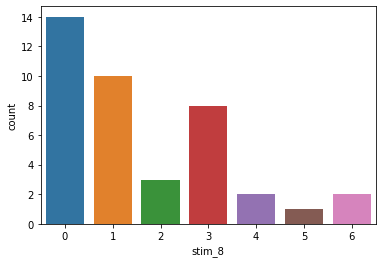

In [27]:
sns.countplot(data = dfx, x= 'stim_8' )

In [5]:
#data['d1']

In [6]:
d1 = np.array(data['d1']) 

In [7]:
d2 = np.array(data['d2'])

In [18]:
d = d1+d2
d

array([[0.     , 1.17505, 1.82905, 3.23005, 2.78105, 4.18205, 3.1131 ,
        4.28815],
       [1.17505, 0.     , 3.0041 , 2.055  , 3.9561 , 3.007  , 4.28815,
        3.1131 ],
       [1.82905, 3.0041 , 0.     , 3.059  , 0.952  , 4.011  , 2.94205,
        4.1171 ],
       [3.23005, 2.055  , 3.059  , 0.     , 4.011  , 0.952  , 4.34305,
        3.168  ],
       [2.78105, 3.9561 , 0.952  , 4.011  , 0.     , 3.059  , 1.99005,
        3.1651 ],
       [4.18205, 3.007  , 4.011  , 0.952  , 3.059  , 0.     , 3.39105,
        2.216  ],
       [3.1131 , 4.28815, 2.94205, 4.34305, 1.99005, 3.39105, 0.     ,
        1.17505],
       [4.28815, 3.1131 , 4.1171 , 3.168  , 3.1651 , 2.216  , 1.17505,
        0.     ]])

In [15]:
dfx = pd.DataFrame(data['x'])
idx = dfx.head().index
n = len(dfx.T)
dfx.columns= ['stim_1','stim_2','stim_3','stim_4','stim_5','stim_6','stim_7','stim_8']
dfx

stim_1  stim_2  stim_3  stim_4  stim_5  stim_6  stim_7  stim_8
0        5       6       6       2       4       1       3       1
1        5       6       8       0       3       1       5       2
2        7       7       8       6       1       2       2       3
3        7       7       6       3       5       4       0       1
4        8       6       8       7       3       3       1       0
5        8       7       8       3       4       0       0       0
6        6       5       5       3       3       1       4       1
7        8       8       6       4       4       0       1       0
8        7       8       8       4       7       0       3       0
9        8       8       8       7       4       1       1       0
10       8       8       8       3       3       0       1       0
11       7       6       7       4       3       1       1       0
12       7       8       7       1       3       0       0       3
13       7       6       8       2       5       0       1       0
14       8       4       6       5       4       3       4       2
15       7       7       8       5       4       5       2       0
16       8       8       7       3       5       0       1       0
17       8       6       7       6       4       2       1       1
18       8       6       8       1       2       0       1       0
19       8       6       8       4       5       1       0       0
20       5       6       6       3       1       2       2       1
21       3       4       4       5       4       5       1       2
22       3       3       5       3       7       2       5       5
23       5       3       6       2       4       1       5       1
24       5       6       6       1       7       1       3       3
25       8       7       3       4       7       5       2       0
26       6       3       7       3       6       1       5       6
27       8       8       6       3       5       1       0       0
28       2       3       4       2       7       6       6       4
29       6       5       6       1       4       1       1       1
30       4       2       3       3       4       5       4       6
31       6       6       6       2       7       2       1       1
32       5       1       7       0       6       0       7       3
33       4       2       5       0       6       1       8       4
34       7       6       7       6       3       1       0       3
35       6       7       3       4       8       6       2       3
36       8       7       7       3       6       1       2       1
37       3       3       5       3       2       3       4       3
38       4       0       8       0       7       0       7       1
39       2       3       6       5       5       2       5       3

In [10]:
# with pm.Model() as hierarchical_model:
#     omega = pm.Beta('omega', 1., 1.)
#     kappa_minus2 = pm.Gamma('kappa_minus2', 0.01, 0.01)
#     kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
#     theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n)
        
#     y = pm.Binomial('y', theta[idx], observed=)    
# pm.model_to_graphviz(hierarchical_model)

# For b = 0.5

In [11]:
x = pd.DataFrame(data['x'])


C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, w]


Sampling 4 chains for 1_500 tune and 5_000 draw iterations (6_000 + 20_000 draws total) took 85 seconds.
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%
w   0.584  0.029   0.531    0.641
c   0.982  0.041   0.905    1.057
r1  0.781  0.011   0.761    0.801
r2  0.703  0.013   0.678    0.726
r3  0.736  0.011   0.716    0.758
r4  0.356  0.014   0.330    0.384
r5  0.651  0.013   0.627    0.675
r6  0.273  0.012   0.251    0.297
r7  0.304  0.014   0.278    0.332
r8  0.227  0.011   0.205    0.248

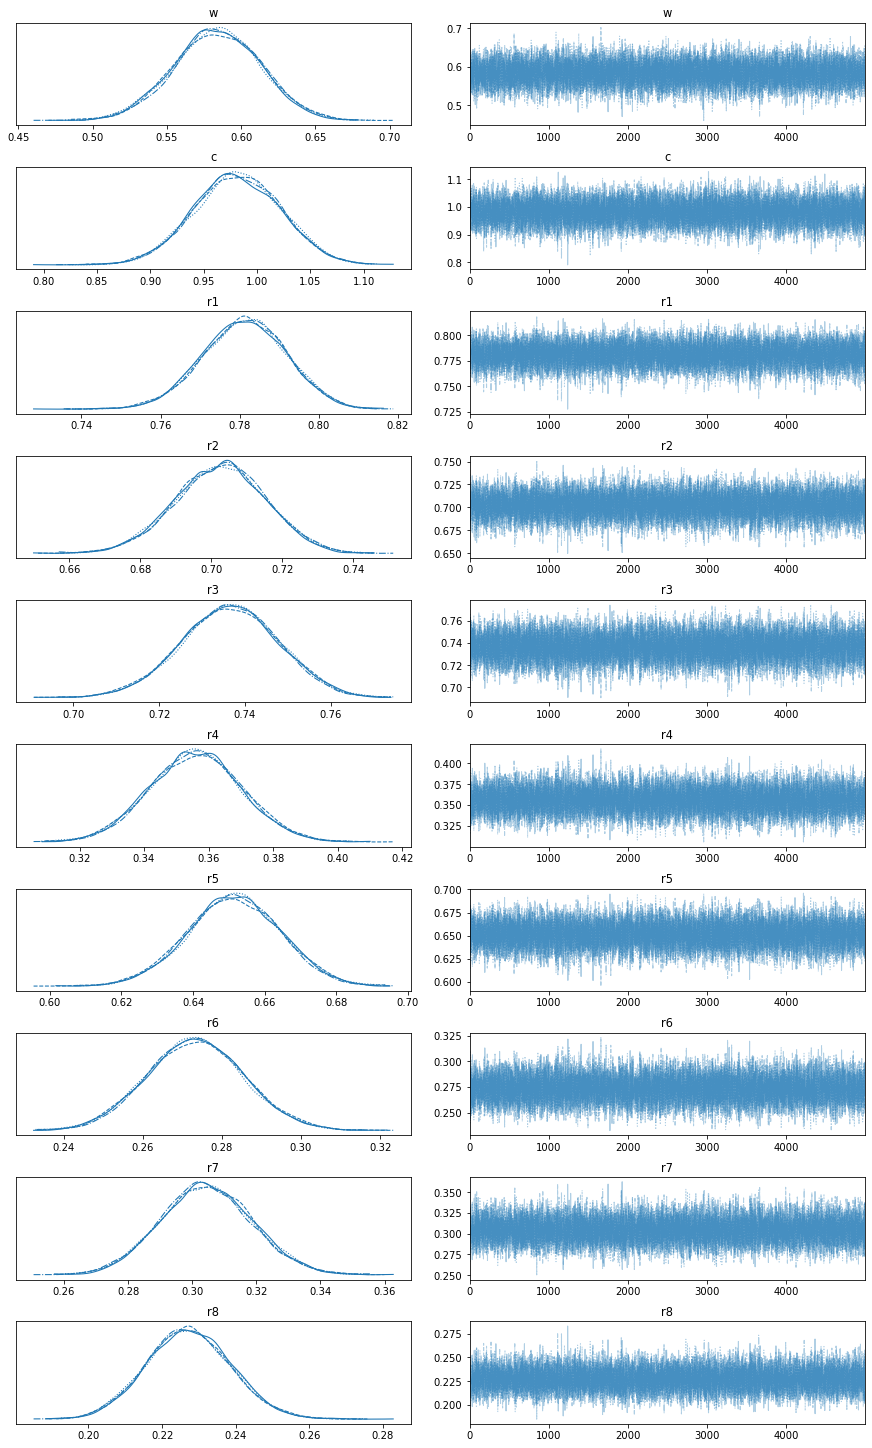

In [12]:
si_a =[]
si_b = []

with pm.Model() as hierarch_mod:
    w = pm.Beta('w', 1.,1.)
    c = pm.Gamma('c',3.,1.)
    b = 0.5
    for i in range(8):             #number of stimuli
        si_a.append(np.exp(-c*(w*d1[i][0] + (1-w)*d2[i][0])) + np.exp(-c*(w*d1[i][1] + (1-w)*d2[i][1]))
                  + np.exp(-c*(w*d1[i][2] + (1-w)*d2[i][2])) + np.exp(-c*(w*d1[i][4] + (1-w)*d2[i][4])))
        si_b.append(np.exp(-c*(w*d1[i][3] + (1-w)*d2[i][3])) + np.exp(-c*(w*d1[i][5] + (1-w)*d2[i][5]))
                  + np.exp(-c*(w*d1[i][6] + (1-w)*d2[i][6])) + np.exp(-c*(w*d1[i][7] + (1-w)*d2[i][7])))
    si_a1 = np.array(si_a)
    si_b1 = np.array(si_b)
    y = []
    for i in range(8):
        ri = pm.Deterministic('r'+str(i+1),b*si_a1[i]/(b*si_a1[i]+(1-b)*si_b1[i]))
        y.append(pm.Binomial('y'+str(i+1),n = 8,p=ri,observed = x.iloc[:,i]))
    trace = pm.sample(5000, tune=1500, random_seed=42)
az.plot_trace(trace)
az.summary(trace, kind='stats')


In [36]:
# for j in range(40):
#     si_a =[]
#     si_b = []
#     with pm.Model() as mod_1:
#         w = pm.Beta('w', 1.,1.)
#         c = pm.Gamma('c',3.,1.)
#         b = 0.5
#         for i in range(8):             #number of stimuli
#             si_a.append(np.exp(-c*(w*d1[i][0] + (1-w)*d2[i][0])) + np.exp(-c*(w*d1[i][1] + (1-w)*d2[i][1]))
#                       + np.exp(-c*(w*d1[i][2] + (1-w)*d2[i][2])) + np.exp(-c*(w*d1[i][4] + (1-w)*d2[i][4])))
#             si_b.append(np.exp(-c*(w*d1[i][3] + (1-w)*d2[i][3])) + np.exp(-c*(w*d1[i][5] + (1-w)*d2[i][5]))
#                       + np.exp(-c*(w*d1[i][6] + (1-w)*d2[i][6])) + np.exp(-c*(w*d1[i][7] + (1-w)*d2[i][7])))
#         si_a1 = np.array(si_a)
#         si_b1 = np.array(si_b)        
#         y = []
#         ri = pm.Deterministic('r_'+str(j),b*si_a1[0]/(b*si_a1[0]+(1-b)*si_b1[0]))
#         y.append(pm.Binomial('y'+str(j),n = 8,p=ri,observed = data['x'][j][0]))
#         trace = pm.sample(5000, tune=1500, random_seed=42)
# az.plot_trace(trace)
# az.summary(trace, kind='stats')

In [4]:
x = pd.DataFrame(data['x'])
xar = np.array(data['x'])
data['x'][1]

NameError: name 'data' is not defined

In [44]:
acc = []

for i in range(40):
    correct = 0
    for j in range(8):
        if(data['a'][j]==1):
            if(xar[i][j]>=4):
                correct+=1
        if(data['a'][j]==2):
            if(xar[i][j]<=4):
                correct+=1
    acc.append(correct/8)
acc

[1.0,
 0.75,
 0.75,
 1.0,
 0.75,
 1.0,
 0.875,
 1.0,
 1.0,
 0.875,
 0.875,
 0.875,
 0.875,
 1.0,
 0.875,
 0.75,
 1.0,
 0.875,
 0.875,
 1.0,
 0.875,
 0.625,
 0.5,
 0.75,
 1.0,
 0.75,
 0.625,
 1.0,
 0.5,
 1.0,
 0.5,
 1.0,
 0.75,
 0.75,
 0.75,
 0.75,
 1.0,
 0.625,
 0.75,
 0.5]

In [48]:
grp1 =[]
grp2 =[]
for i in range(40):
    if(acc[i]>=0.875):
        grp1.append(data['x'][i])
    else:
        grp2.append(data['x'][i])
grp1df = pd.DataFrame(grp1)
grp2df = pd.DataFrame(grp2)


C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, w]


Sampling 4 chains for 1_500 tune and 5_000 draw iterations (6_000 + 20_000 draws total) took 40 seconds.
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%
w   0.709  0.029   0.655    0.764
c   1.481  0.068   1.352    1.608
r1  0.887  0.010   0.868    0.906
r2  0.831  0.014   0.806    0.859
r3  0.782  0.015   0.754    0.811
r4  0.328  0.019   0.293    0.363
r5  0.684  0.017   0.651    0.716
r6  0.230  0.016   0.200    0.261
r7  0.164  0.016   0.135    0.194
r8  0.111  0.011   0.091    0.132

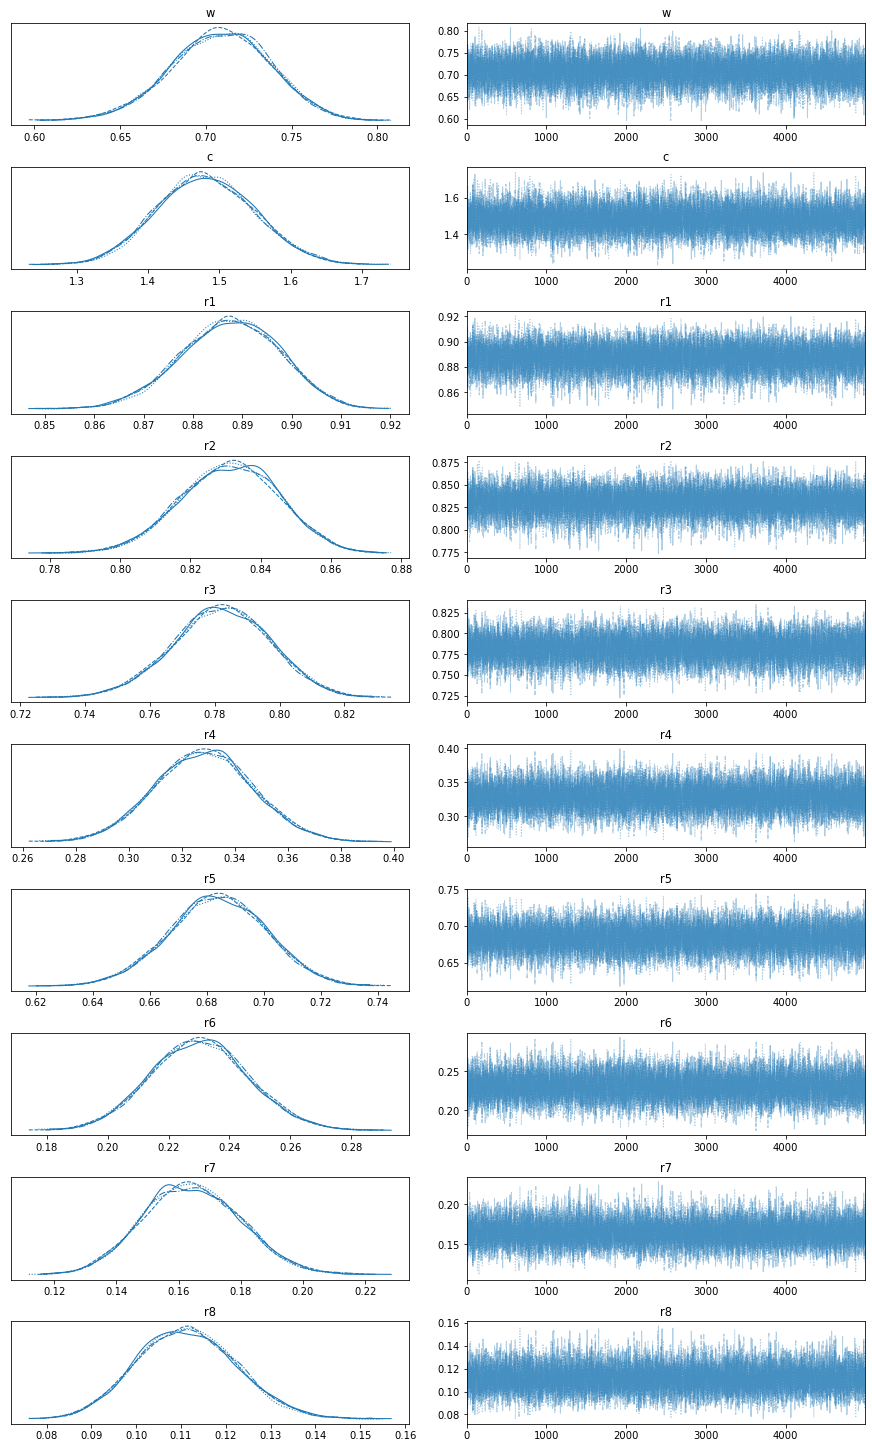

In [50]:
si_a =[]
si_b = []

with pm.Model() as mod_acc_grp:
    w = pm.Beta('w', 1.,1.)
    c = pm.Gamma('c',3.,1.)
    b = 0.5
    for i in range(8):             #number of stimuli
        si_a.append(np.exp(-c*(w*d1[i][0] + (1-w)*d2[i][0])) + np.exp(-c*(w*d1[i][1] + (1-w)*d2[i][1]))
                  + np.exp(-c*(w*d1[i][2] + (1-w)*d2[i][2])) + np.exp(-c*(w*d1[i][4] + (1-w)*d2[i][4])))
        si_b.append(np.exp(-c*(w*d1[i][3] + (1-w)*d2[i][3])) + np.exp(-c*(w*d1[i][5] + (1-w)*d2[i][5]))
                  + np.exp(-c*(w*d1[i][6] + (1-w)*d2[i][6])) + np.exp(-c*(w*d1[i][7] + (1-w)*d2[i][7])))
    si_a1 = np.array(si_a)
    si_b1 = np.array(si_b)
    y = []
    for i in range(8):
        ri = pm.Deterministic('r'+str(i+1),b*si_a1[i]/(b*si_a1[i]+(1-b)*si_b1[i]))
        y.append(pm.Binomial('y'+str(i+1),n = 8,p=ri,observed = grp1df.iloc[:,i]))
    trace = pm.sample(5000, tune=1500, random_seed=42)
az.plot_trace(trace)
az.summary(trace, kind='stats')


C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, w]


Sampling 4 chains for 1_500 tune and 5_000 draw iterations (6_000 + 20_000 draws total) took 41 seconds.
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%
w   0.319  0.072   0.183    0.452
c   0.556  0.061   0.442    0.672
r1  0.632  0.019   0.596    0.668
r2  0.544  0.021   0.503    0.583
r3  0.669  0.018   0.636    0.704
r4  0.366  0.021   0.326    0.404
r5  0.633  0.019   0.599    0.670
r6  0.332  0.019   0.295    0.367
r7  0.471  0.023   0.432    0.516
r8  0.384  0.020   0.347    0.421

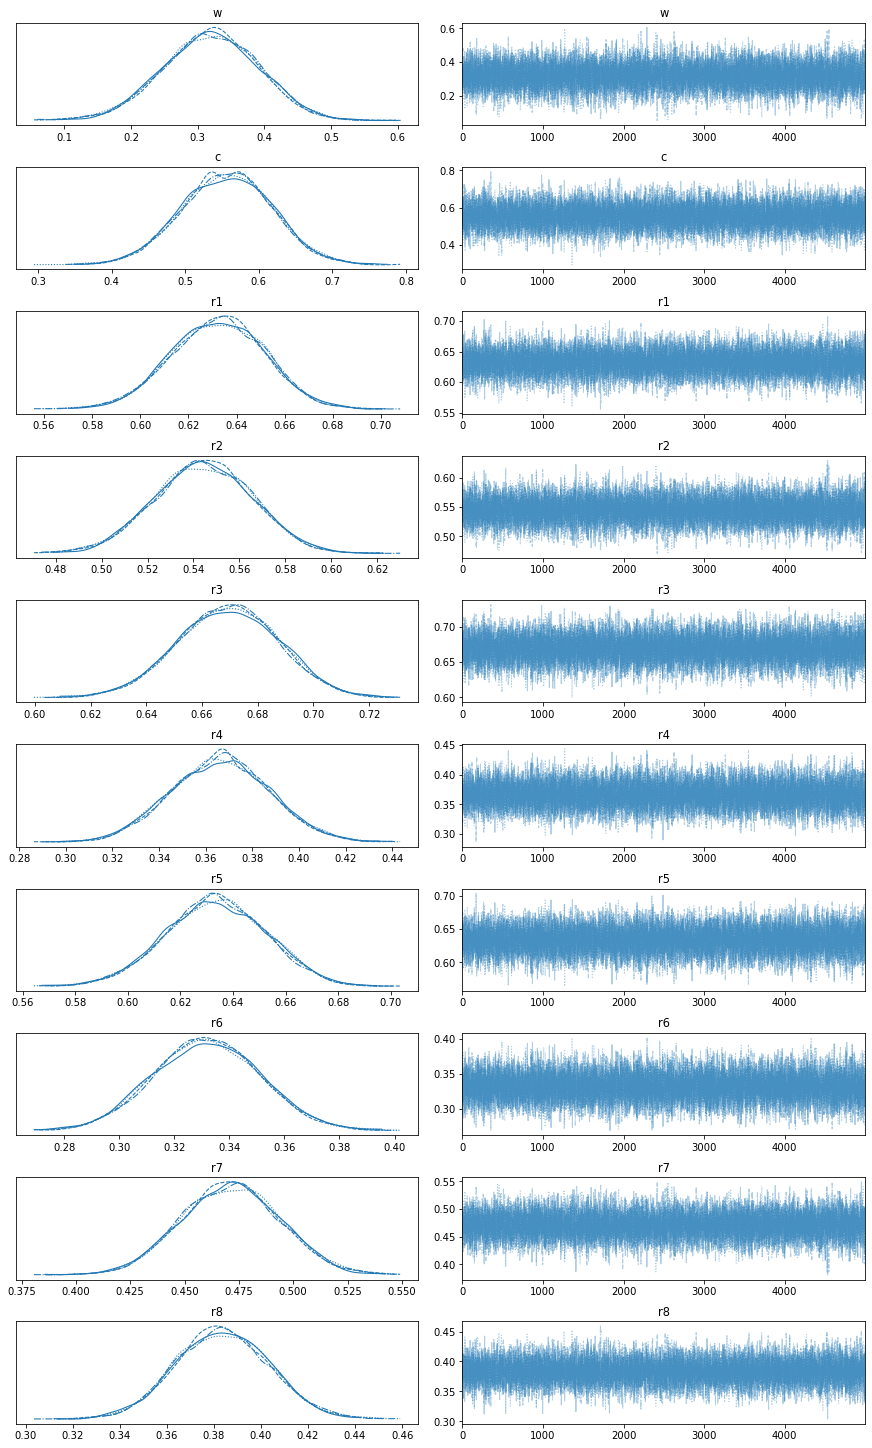

In [51]:
si_a =[]
si_b = []

with pm.Model() as mod_acc_grp:
    w = pm.Beta('w', 1.,1.)
    c = pm.Gamma('c',3.,1.)
    b = 0.5
    for i in range(8):             #number of stimuli
        si_a.append(np.exp(-c*(w*d1[i][0] + (1-w)*d2[i][0])) + np.exp(-c*(w*d1[i][1] + (1-w)*d2[i][1]))
                  + np.exp(-c*(w*d1[i][2] + (1-w)*d2[i][2])) + np.exp(-c*(w*d1[i][4] + (1-w)*d2[i][4])))
        si_b.append(np.exp(-c*(w*d1[i][3] + (1-w)*d2[i][3])) + np.exp(-c*(w*d1[i][5] + (1-w)*d2[i][5]))
                  + np.exp(-c*(w*d1[i][6] + (1-w)*d2[i][6])) + np.exp(-c*(w*d1[i][7] + (1-w)*d2[i][7])))
    si_a1 = np.array(si_a)
    si_b1 = np.array(si_b)
    y = []
    for i in range(8):
        ri = pm.Deterministic('r'+str(i+1),b*si_a1[i]/(b*si_a1[i]+(1-b)*si_b1[i]))
        y.append(pm.Binomial('y'+str(i+1),n = 8,p=ri,observed = grp2df.iloc[:,i]))
    trace = pm.sample(5000, tune=1500, random_seed=42)
az.plot_trace(trace)
az.summary(trace, kind='stats')


# b as a free parameter

C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, c, w]


Sampling 4 chains for 1_500 tune and 5_000 draw iterations (6_000 + 20_000 draws total) took 46 seconds.
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%
w   0.584  0.030   0.529    0.640
c   0.982  0.040   0.906    1.058
b   0.487  0.011   0.466    0.508
r1  0.772  0.013   0.748    0.797
r2  0.692  0.016   0.662    0.722
r3  0.726  0.015   0.699    0.754
r4  0.344  0.018   0.311    0.377
r5  0.640  0.017   0.609    0.672
r6  0.263  0.015   0.236    0.292
r7  0.294  0.017   0.262    0.325
r8  0.218  0.013   0.194    0.244

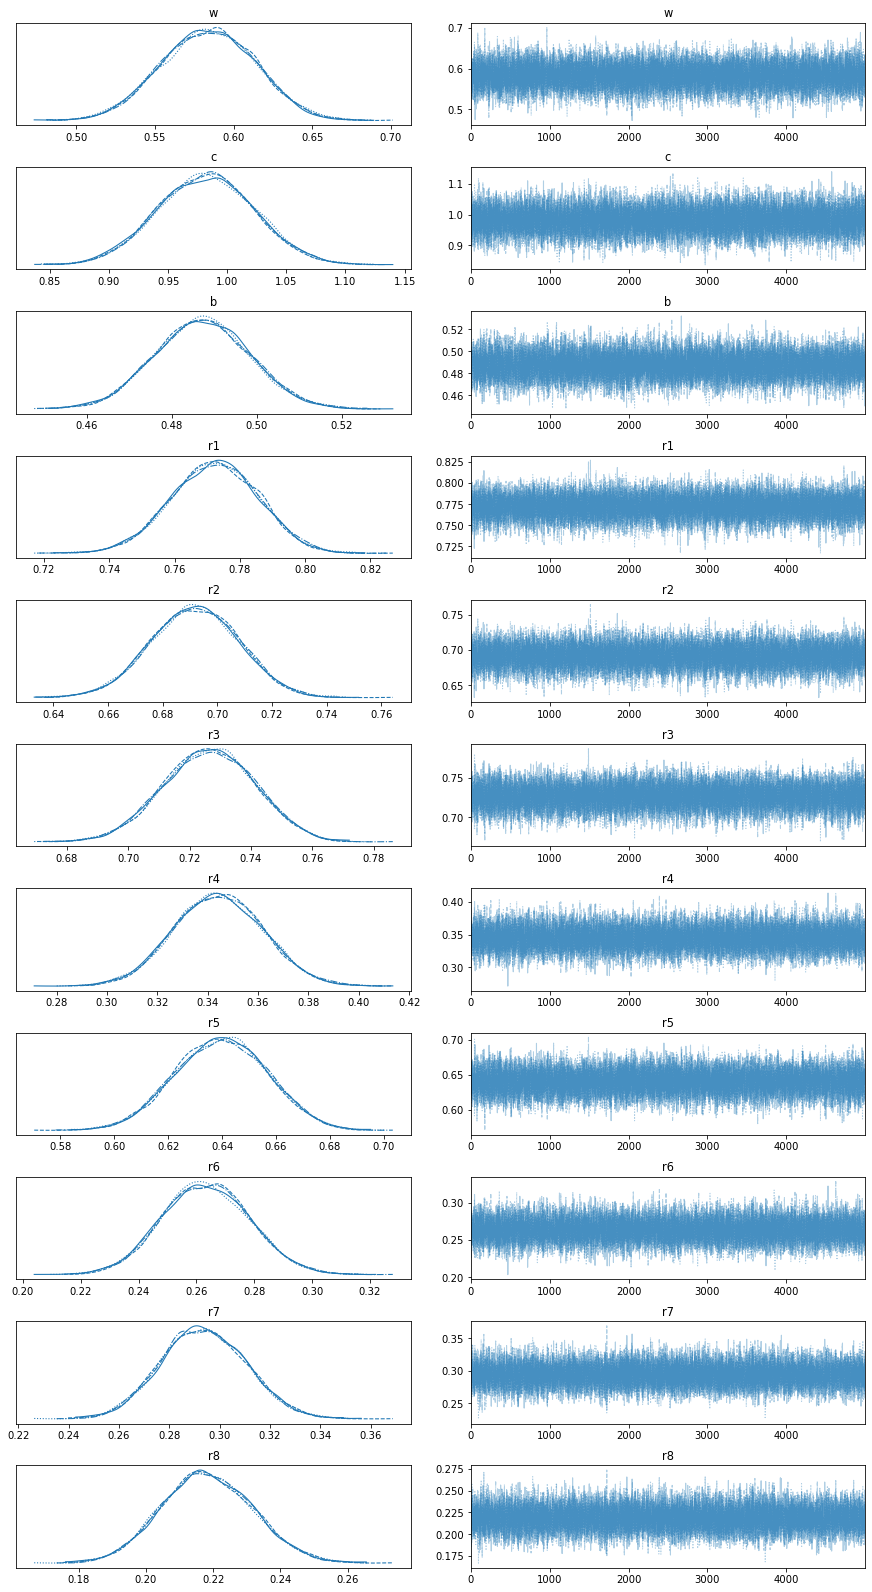

In [60]:
si_a =[]
si_b = []

with pm.Model() as mod_2:
    w = pm.Beta('w', 1.,1.)
    c = pm.Gamma('c',3.,1.)
    b = pm.Beta('b',1.,1.)
    for i in range(8):             #number of stimuli
        si_a.append(np.exp(-c*(w*d1[i][0] + (1-w)*d2[i][0])) + np.exp(-c*(w*d1[i][1] + (1-w)*d2[i][1]))
                  + np.exp(-c*(w*d1[i][2] + (1-w)*d2[i][2])) + np.exp(-c*(w*d1[i][4] + (1-w)*d2[i][4])))
        si_b.append(np.exp(-c*(w*d1[i][3] + (1-w)*d2[i][3])) + np.exp(-c*(w*d1[i][5] + (1-w)*d2[i][5]))
                  + np.exp(-c*(w*d1[i][6] + (1-w)*d2[i][6])) + np.exp(-c*(w*d1[i][7] + (1-w)*d2[i][7])))
    si_a1 = np.array(si_a)
    si_b1 = np.array(si_b)
    y = []
    for i in range(8):
        ri = pm.Deterministic('r'+str(i+1),b*si_a1[i]/(b*si_a1[i]+(1-b)*si_b1[i]))
        y.append(pm.Binomial('y'+str(i+1),n = 8,p=ri,observed = x.iloc[:,i]))
    trace = pm.sample(5000, tune=1500, random_seed=42)
az.plot_trace(trace)
az.summary(trace, kind='stats')


C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, c, w]


Sampling 4 chains for 1_500 tune and 5_000 draw iterations (6_000 + 20_000 draws total) took 44 seconds.
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%
w   0.583  0.030   0.528    0.639
c   0.985  0.041   0.908    1.061
b   0.465  0.011   0.444    0.485
r1  0.757  0.014   0.732    0.783
r2  0.673  0.016   0.640    0.702
r3  0.709  0.015   0.680    0.736
r4  0.324  0.017   0.293    0.357
r5  0.620  0.017   0.588    0.651
r6  0.246  0.014   0.220    0.273
r7  0.275  0.016   0.245    0.306
r8  0.203  0.013   0.180    0.228

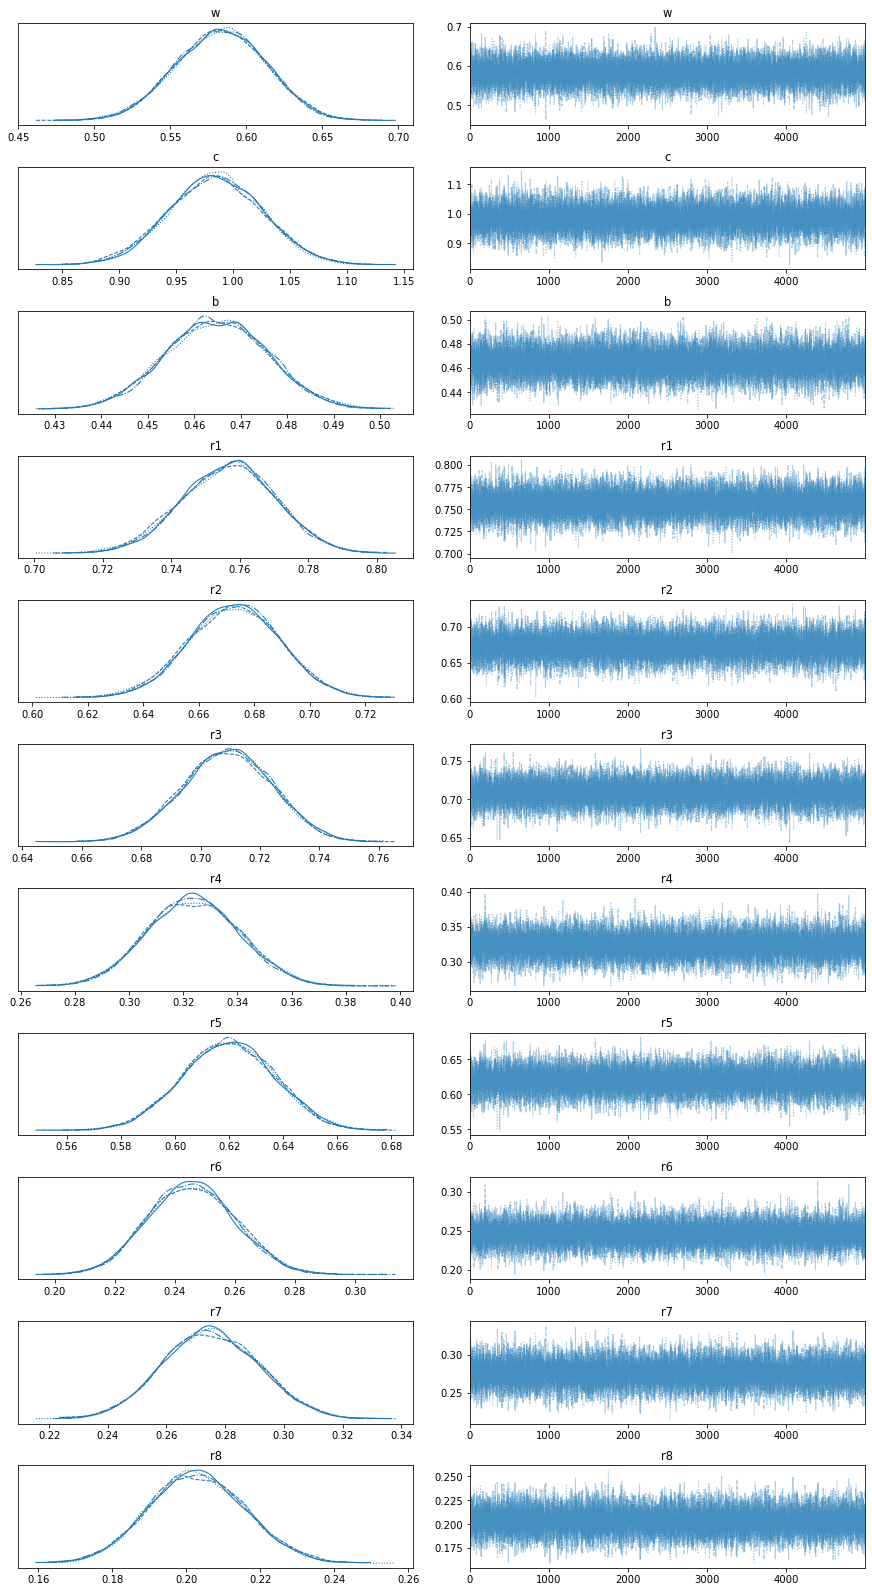

In [58]:
si_a =[]
si_b = []

with pm.Model() as hierarch_mod_1:
    w = pm.Beta('w', 1.,1.)
    c = pm.Gamma('c',3.,1.)
    b = pm.Beta('b',1.,100)
    for i in range(8):             #number of stimuli
        si_a.append(np.exp(-c*(w*d1[i][0] + (1-w)*d2[i][0])) + np.exp(-c*(w*d1[i][1] + (1-w)*d2[i][1]))
                  + np.exp(-c*(w*d1[i][2] + (1-w)*d2[i][2])) + np.exp(-c*(w*d1[i][4] + (1-w)*d2[i][4])))
        si_b.append(np.exp(-c*(w*d1[i][3] + (1-w)*d2[i][3])) + np.exp(-c*(w*d1[i][5] + (1-w)*d2[i][5]))
                  + np.exp(-c*(w*d1[i][6] + (1-w)*d2[i][6])) + np.exp(-c*(w*d1[i][7] + (1-w)*d2[i][7])))
    si_a1 = np.array(si_a)
    si_b1 = np.array(si_b)
    y = []
    for i in range(8):
        ri = pm.Deterministic('r'+str(i+1),b*si_a1[i]/(b*si_a1[i]+(1-b)*si_b1[i]))
        y.append(pm.Binomial('y'+str(i+1),n = 8,p=ri,observed = x.iloc[:,i]))
    trace = pm.sample(5000, tune=1500, random_seed=42)
az.plot_trace(trace)
az.summary(trace, kind='stats')


C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


posterior predictive variable y1's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y2's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y3's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y4's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y5's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y6's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y7's

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

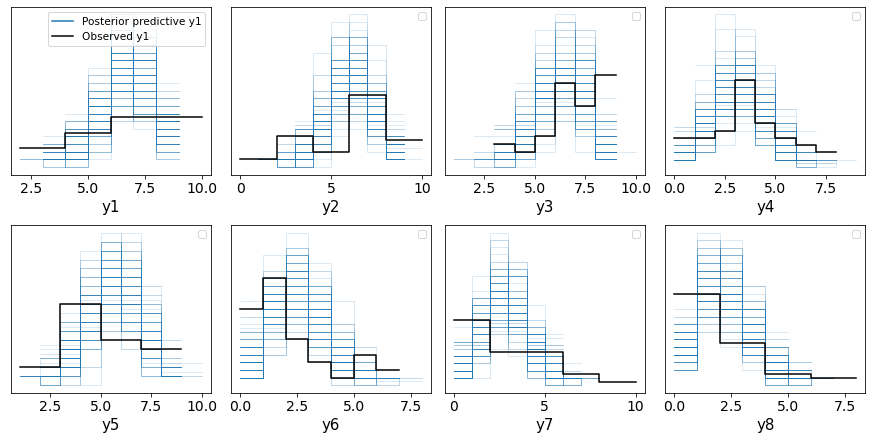

In [61]:
y_ppc_t = pm.sample_posterior_predictive(trace, 100, mod_2, random_seed=123)
y_pred_t = az.from_pymc3(model=mod_2, trace=trace, posterior_predictive=y_ppc_t)
ax = az.plot_ppc(y_pred_t, figsize=(12, 6), mean=False)
ax[0].legend(fontsize=15)
plt.xlim(40, 70)

In [63]:
y_ppc_t = pm.sample_posterior_predictive(trace, 100, mod_acc_grp, random_seed=123)
y_pred_t = az.from_pymc3(model=mod_acc_grp, trace=trace, posterior_predictive=y_ppc_t)
ax = az.plot_ppc(y_pred_t, figsize=(12, 6), mean=False)
#ax[0].legend(fontsize=15)
plt.xlim(40, 70)

C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


posterior predictive variable y1's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y2's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y3's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y4's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y5's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y6's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y7's

(40.0, 70.0)

C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, w]


Sampling 4 chains for 1_500 tune and 5_000 draw iterations (6_000 + 20_000 draws total) took 44 seconds.
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\udaya\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%
w   0.584  0.021   0.546    0.623
c   0.979  0.041   0.901    1.053
r1  0.781  0.010   0.762    0.800
r2  0.702  0.011   0.682    0.723
r3  0.736  0.010   0.717    0.755
r4  0.357  0.011   0.335    0.378
r5  0.651  0.011   0.631    0.671
r6  0.274  0.011   0.255    0.295
r7  0.305  0.012   0.282    0.327
r8  0.228  0.011   0.208    0.248

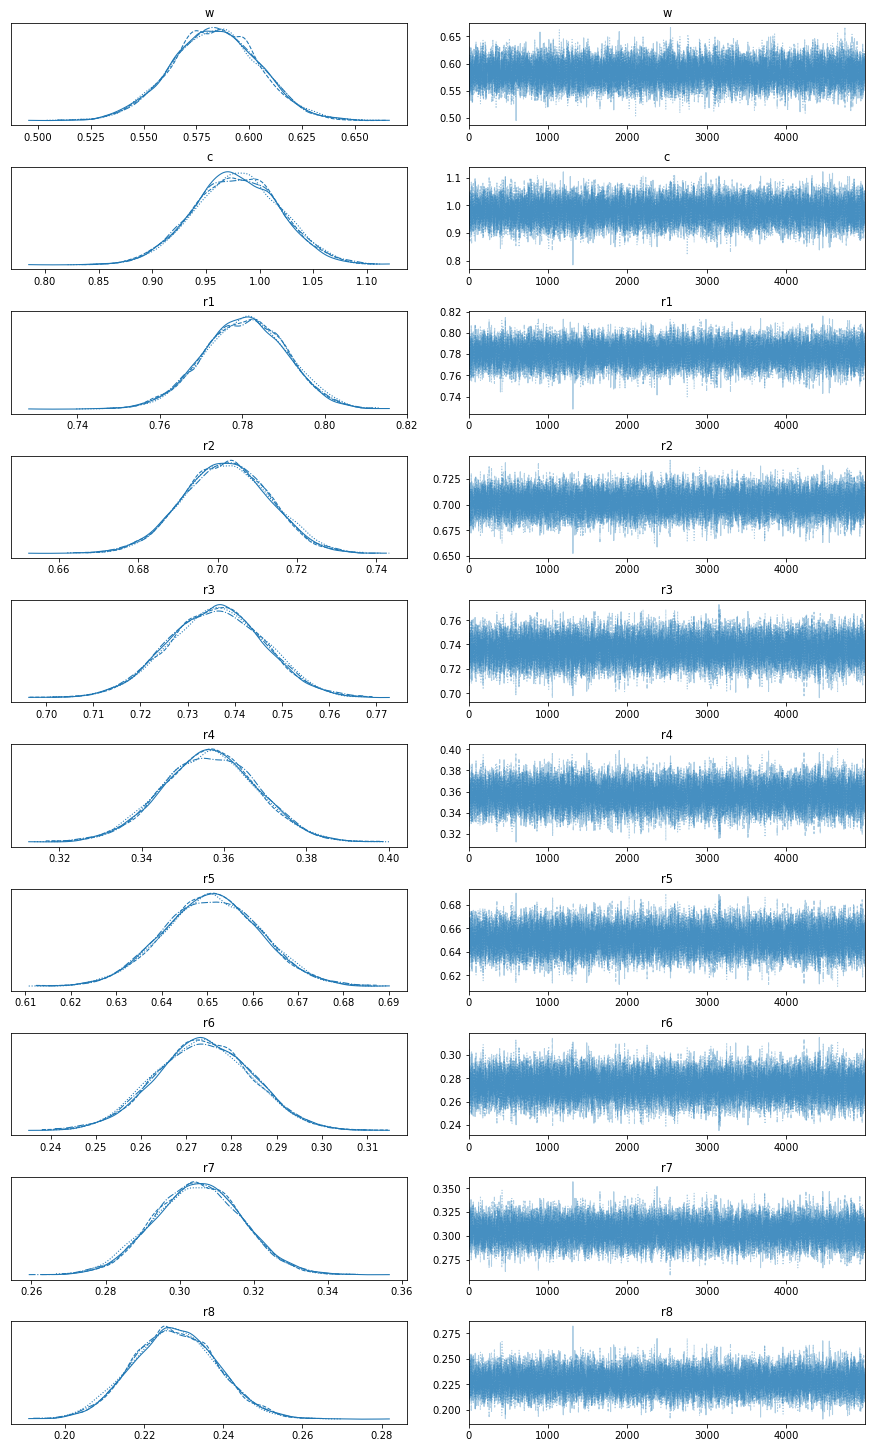

In [67]:
si_a =[]
si_b = []

with pm.Model() as hierarch_mod:
    w = pm.Normal('w', mu = 0.584,sigma = 0.029 )
    c = pm.HalfNormal('c',sd= 1)
    b = 0.5
    for i in range(8):             #number of stimuli
        si_a.append(np.exp(-c*(w*d1[i][0] + (1-w)*d2[i][0])) + np.exp(-c*(w*d1[i][1] + (1-w)*d2[i][1]))
                  + np.exp(-c*(w*d1[i][2] + (1-w)*d2[i][2])) + np.exp(-c*(w*d1[i][4] + (1-w)*d2[i][4])))
        si_b.append(np.exp(-c*(w*d1[i][3] + (1-w)*d2[i][3])) + np.exp(-c*(w*d1[i][5] + (1-w)*d2[i][5]))
                  + np.exp(-c*(w*d1[i][6] + (1-w)*d2[i][6])) + np.exp(-c*(w*d1[i][7] + (1-w)*d2[i][7])))
    si_a1 = np.array(si_a)
    si_b1 = np.array(si_b)
    y = []
    for i in range(8):
        ri = pm.Deterministic('r'+str(i+1),b*si_a1[i]/(b*si_a1[i]+(1-b)*si_b1[i]))
        y.append(pm.Binomial('y'+str(i+1),n = 8,p=ri,observed = x.iloc[:,i]))
    trace = pm.sample(5000, tune=1500, random_seed=42)
az.plot_trace(trace)
az.summary(trace, kind='stats')


C:\Users\udaya\anaconda3\lib\site-packages\pymc3\sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


posterior predictive variable y1's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y2's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y3's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y4's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y5's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y6's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable y7's

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

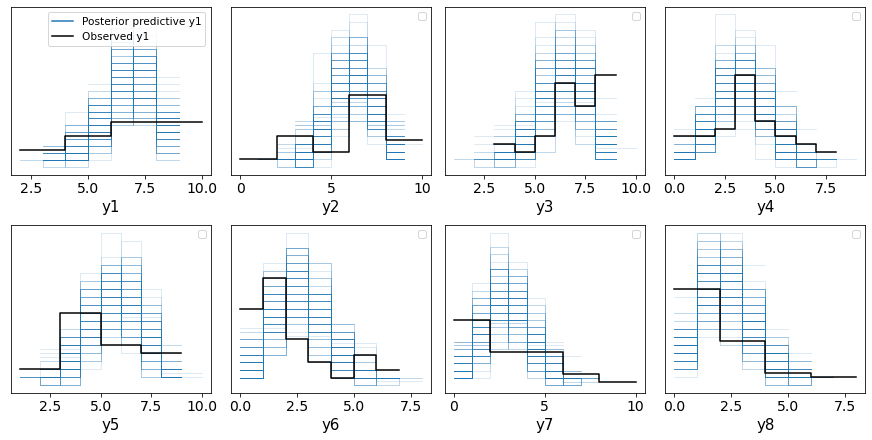

In [68]:
y_ppc_t = pm.sample_posterior_predictive(trace, 100, hierarch_mod, random_seed=123)
y_pred_t = az.from_pymc3(model=hierarch_mod, trace=trace, posterior_predictive=y_ppc_t)
ax = az.plot_ppc(y_pred_t, figsize=(12, 6), mean=False)
ax[0].legend(fontsize=15)
plt.xlim(40, 70)